<a href="https://colab.research.google.com/github/squadOito/soulcodead2/blob/joseaureliok%2Fnotebook/notebooks/notebook_global_horizontal_means_bruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Equipe 08**

**Integrantes**: Adriano, José Aurelio, Marcos Paulo, Paulo Vitorino, Renato e Wesley

Professores: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro

## Preparação de Ambiente
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [1]:
# instalaçao de biblioteca para interagir com google cloud
!pip install gcsfs -q

In [2]:
# instalaçao de biblioteca para validar dados com pandera
!pip install pandera -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.9 MB/s eta 0:00:00


In [3]:
# Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
import re
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from google.cloud import storage
from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [4]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

### Compartilhamento Chave GDrive

In [6]:
# Cria compartilhamento com Google Drive
drive.mount('/content/drive', force_remount=True)

# Arquivo a ser acessado na pasta compartilhada
target = 'projeto-final-ad2-e8-ae566c3a2c2b.json'

# Caminho completo da pasta compartilhada
folder = '/content/drive/MyDrive/Classroom/AD2 - Analista de Dados/ProjetoFinal'

# Acesso ao arquivo no colab
serviceAccount = os.path.join(folder, target)

Mounted at /content/drive


# ETL
Extração, transformação, carregamento dos dados



## Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

In [7]:
# Conexão com a conta do Google Cloud
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [8]:
# Conexão com a bucket do Google Cloud
client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8')

In [9]:
# Caminhodo arquivo
path = "gs://projeto-final-ad2-e8/dados/tratados/global_horizontal_means.csv"

*Read* Pandas

In [10]:
# Leitura dataframe pandas
read = pd.read_csv(path,
                         sep= ';',
                         encoding = 'utf-8')

In [11]:
# exibindo primeiras linhas
read.head(10)

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Brasil,-53.549,-33.7005,4444,6603,5747,4999,3597,2536,2172,2292,2924,3784,5180,6453,7037
1,2,Brasil,-53.449,-33.7005,4446,6610,5735,4986,3588,2550,2167,2280,2926,3810,5199,6470,7036
2,3,Brasil,-53.349,-33.7005,4452,6630,5732,4989,3572,2563,2170,2279,2928,3820,5213,6465,7058
3,4,Brasil,-53.249,-33.7005,4468,6709,5820,5047,3575,2555,2151,2247,2904,3818,5219,6476,7090
4,5,Brasil,-53.549,-33.6005,4454,6658,5771,5014,3620,2546,2159,2271,2932,3797,5168,6443,7072
5,6,Brasil,-53.449,-33.6005,4451,6635,5775,5004,3607,2569,2161,2269,2924,3798,5170,6454,7044
6,7,Brasil,-53.349,-33.6005,4441,6574,5714,4961,3594,2591,2178,2276,2939,3816,5215,6453,6989
7,8,Brasil,-53.249,-33.6005,4437,6563,5714,4965,3576,2579,2163,2259,2935,3831,5225,6450,6982
8,9,Brasil,-53.149,-33.6005,4422,6572,5734,4972,3543,2557,2155,2247,2901,3798,5190,6407,6988
9,10,Brasil,-53.549,-33.5005,4486,6716,5836,5048,3660,2576,2164,2270,2937,3818,5190,6487,7128


In [12]:
# renomeação do dataframe lido
df = read

## Pré-análise

In [13]:
# Visualização geral
display(df)

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Brasil,-53.549,-33.7005,4444,6603,5747,4999,3597,2536,2172,2292,2924,3784,5180,6453,7037
1,2,Brasil,-53.449,-33.7005,4446,6610,5735,4986,3588,2550,2167,2280,2926,3810,5199,6470,7036
2,3,Brasil,-53.349,-33.7005,4452,6630,5732,4989,3572,2563,2170,2279,2928,3820,5213,6465,7058
3,4,Brasil,-53.249,-33.7005,4468,6709,5820,5047,3575,2555,2151,2247,2904,3818,5219,6476,7090
4,5,Brasil,-53.549,-33.6005,4454,6658,5771,5014,3620,2546,2159,2271,2932,3797,5168,6443,7072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72267,72268,Brasil,-60.349,5.1995,4655,4138,4328,4684,4875,4514,4447,4622,5019,5303,5055,4717,4156
72268,72269,Brasil,-60.249,5.1995,4603,3992,4190,4483,4751,4426,4459,4654,5060,5396,5079,4676,4073
72269,72270,Brasil,-60.149,5.1995,4567,3949,4090,4361,4604,4370,4402,4732,5103,5464,5107,4645,3972
72270,72271,Brasil,-60.249,5.2995,4725,4048,4271,4554,4867,4554,4545,4769,5224,5603,5274,4849,4138


### Verificação

In [14]:
# Visualização de forma aleatoria
view= df.sample(20)
view

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
11076,11077,Brasil,-46.849,-20.1005,4988,5361,5617,4753,4712,4275,4105,4367,5389,5279,5447,5126,5429
19167,19168,Brasil,-55.449,-15.8005,4976,5168,5030,4820,4707,4473,4437,4620,5553,5091,5090,5329,5398
11140,11141,Brasil,-40.449,-20.1005,4739,5926,6223,5212,4428,3819,3558,3640,4204,4687,4756,4773,5651
39685,39686,Brasil,-50.149,-8.5005,5032,4913,4976,4757,4660,4776,5052,5098,5794,5433,5074,4974,4874
35618,35619,Brasil,-39.149,-9.6005,5534,6182,6068,5862,5304,4518,4204,4435,5102,6003,6068,6378,6284
54059,54060,Brasil,-68.449,-4.7005,4419,4078,4559,4298,4250,3909,4098,4140,4837,5013,4887,4629,4327
14963,14964,Brasil,-39.249,-18.0005,5301,6537,6668,5846,4829,4084,3772,3924,4783,5334,5696,5654,6481
16984,16985,Brasil,-48.349,-16.9005,5298,5604,5816,5113,5036,4768,4605,4852,5683,5590,5637,5261,5608
70180,70181,Brasil,-52.549,1.5995,4558,4080,4027,4075,4207,4422,4587,4685,5051,5211,5179,4952,4221
2826,2827,Brasil,-54.949,-27.7005,4651,6471,5956,5176,4070,3097,2518,2816,3636,4025,5146,6244,6650


In [15]:
# Tamanho total de (linhas , colunas)
df.shape

(72272, 17)

In [16]:
# Todos os tipos de dados presentes
df.dtypes

ID           int64
COUNTRY     object
LON        float64
LAT        float64
ANNUAL       int64
JAN          int64
FEB          int64
MAR          int64
APR          int64
MAY          int64
JUN          int64
JUL          int64
AUG          int64
SEP          int64
OCT          int64
NOV          int64
DEC          int64
dtype: object

In [18]:
# Contagem de observações para cada coluna
df.count()

ID         72272
COUNTRY    72272
LON        72272
LAT        72272
ANNUAL     72272
JAN        72272
FEB        72272
MAR        72272
APR        72272
MAY        72272
JUN        72272
JUL        72272
AUG        72272
SEP        72272
OCT        72272
NOV        72272
DEC        72272
dtype: int64

In [19]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72272 entries, 0 to 72271
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       72272 non-null  int64  
 1   COUNTRY  72272 non-null  object 
 2   LON      72272 non-null  float64
 3   LAT      72272 non-null  float64
 4   ANNUAL   72272 non-null  int64  
 5   JAN      72272 non-null  int64  
 6   FEB      72272 non-null  int64  
 7   MAR      72272 non-null  int64  
 8   APR      72272 non-null  int64  
 9   MAY      72272 non-null  int64  
 10  JUN      72272 non-null  int64  
 11  JUL      72272 non-null  int64  
 12  AUG      72272 non-null  int64  
 13  SEP      72272 non-null  int64  
 14  OCT      72272 non-null  int64  
 15  NOV      72272 non-null  int64  
 16  DEC      72272 non-null  int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 9.4+ MB


In [21]:
# valores únicos por atributo
df.apply(pd.Series.nunique)

ID         72272
COUNTRY        1
LON          393
LAT          391
ANNUAL      2218
JAN         3125
FEB         2959
MAR         2470
APR         2391
MAY         2907
JUN         3295
JUL         3458
AUG         3518
SEP         3472
OCT         2827
NOV         2496
DEC         3108
dtype: int64

### Gráficos


In [44]:
# lista para retirada da coluna ID
listaUnique = df.columns[1:]

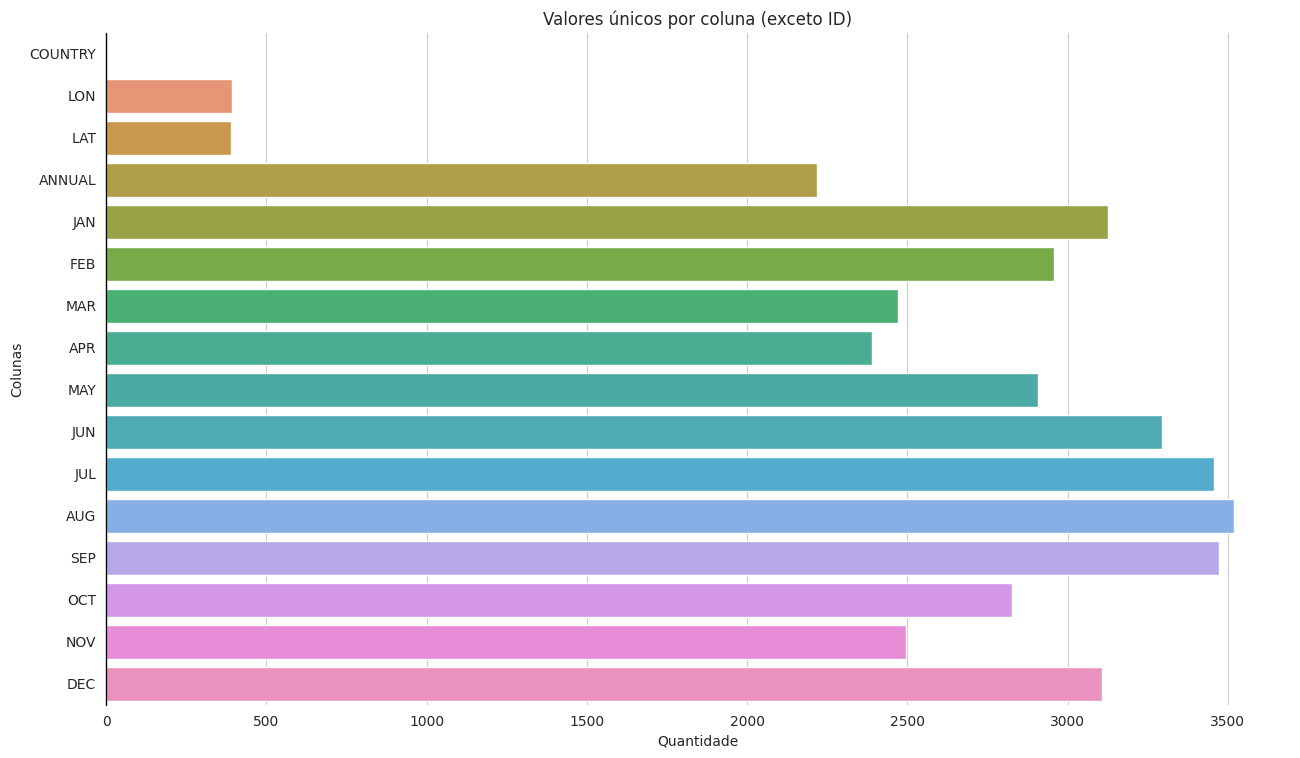

In [47]:
# configuração do estilo de fundo
sns.set_style('whitegrid')

# selecção da paleta de cores
sns.set_palette('colorblind')

# parâmetros do gráfico de barras do seaborn
axis = sns.barplot(y=(df[listaUnique].count()).index,
                   x=df[listaUnique].apply(pd.Series.nunique), dodge=2)

# configurações dos eixos
axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False, linewidth=1)
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3)))

# ajuste para plotagem nos eixos
plt.subplots_adjust(left=0.15, bottom=0.1, right=2, top=1.5)

# nomeação de eixos e título
plt.ylabel('Colunas')
plt.xlabel('Quantidade')
plt.title('Valores únicos por coluna (exceto ID)')

plt.show()

###Backup

In [48]:
# Backup local
dfbackup1 = df.copy()

## Transformation
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

### Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

#### Verificando nulos e duplicados

In [49]:
# Verificar se há valores duplicados
df.duplicated().sum()

0

In [50]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

ID         0
COUNTRY    0
LON        0
LAT        0
ANNUAL     0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
dtype: int64

In [51]:
# Verificar se há valores nulos/ausentes
df.isna().sum()

ID         0
COUNTRY    0
LON        0
LAT        0
ANNUAL     0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
dtype: int64

In [52]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
                  Valores únicos para o atributo ID:                  
----------------------------------------------------------------------

[    1     2     3 ... 72270 72271 72272]

----------------------------------------------------------------------
----------------------------------------------------------------------
               Valores únicos para o atributo COUNTRY:                
----------------------------------------------------------------------

['Brasil']

----------------------------------------------------------------------
----------------------------------------------------------------------
                 Valores únicos para o atributo LON:                  
----------------------------------------------------------------------

[-53.549 -53.449 -53.349 -53.249 -53.149 -53.049 -52.949 -52.849 -52.749
 -52.649 -52.549 -52.449 -52.349 -53.649 -52.249 -53.749 -52.149 -52.049
 -53.849 -51.94

In [53]:
# Verificando os valores presentes na coluna para identificar inconsistencias
for coluna in df:
    valor = (df[coluna].groupby(df[coluna]).count())
    print("-"*70)
    msg = f"Contando valores {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)

----------------------------------------------------------------------
                         Contando valores ID:                         
----------------------------------------------------------------------

ID
1        1
2        1
3        1
4        1
5        1
        ..
72268    1
72269    1
72270    1
72271    1
72272    1
Name: ID, Length: 72272, dtype: int64

----------------------------------------------------------------------
----------------------------------------------------------------------
                      Contando valores COUNTRY:                       
----------------------------------------------------------------------

COUNTRY
Brasil    72272
Name: COUNTRY, dtype: int64

----------------------------------------------------------------------
----------------------------------------------------------------------
                        Contando valores LON:                         
----------------------------------------------------------------------



##### Backup

In [ ]:
# Backup
dfbackup4 = df.copy()

### Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

#### **Tipagem**

In [54]:
df.sample(3)

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
53152,53153,Brasil,-52.349,-5.0005,4581,4206,4357,4373,4281,4358,4757,4827,5284,4893,4694,4656,4283
18381,18382,Brasil,-48.549,-16.2005,5301,5500,5624,5158,5124,4863,4652,4938,5812,5621,5620,5195,5500
24362,24363,Brasil,-56.749,-13.4005,5062,5156,5011,4985,4897,4709,4616,4777,5341,5219,5433,5297,5301


#### Tradução | Ajustes nomes

In [55]:
# Lista de nome das colunas atuais
colunas_atuais = df.columns
colunas_atuais

Index(['ID', 'COUNTRY', 'LON', 'LAT', 'ANNUAL', 'JAN', 'FEB', 'MAR', 'APR',
       'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')

In [56]:
# Lista de nome de colunas atualizados
subs_colunas = ['id', 'pais', 'longitude', 'latitude', 'anual', 'janeiro', 'fevereiro', 'marco', 'abril',
       'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

In [57]:
# Substituição dos nomes das colunas
df.columns = subs_colunas

In [58]:
# Verificação dos nomes de colunas
df.columns

Index(['id', 'pais', 'longitude', 'latitude', 'anual', 'janeiro', 'fevereiro',
       'marco', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro',
       'outubro', 'novembro', 'dezembro'],
      dtype='object')

In [59]:
# Verificação dos tipos de dados para cada coluna
df.dtypes

id             int64
pais          object
longitude    float64
latitude     float64
anual          int64
janeiro        int64
fevereiro      int64
marco          int64
abril          int64
maio           int64
junho          int64
julho          int64
agosto         int64
setembro       int64
outubro        int64
novembro       int64
dezembro       int64
dtype: object

# **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [61]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'id': pa.Column(pa.Int),
    'pais': pa.Column(pa.String),
    'longitude': pa.Column(pa.Float),
    'latitude': pa.Column(pa.Float),
    'anual': pa.Column(pa.Int),
    'janeiro': pa.Column(pa.Int),
    'fevereiro': pa.Column(pa.Int),
    'marco': pa.Column(pa.Int),
    'abril': pa.Column(pa.Int),
    'maio': pa.Column(pa.Int),
    'junho': pa.Column(pa.Int),
    'julho': pa.Column(pa.Int),
    'agosto': pa.Column(pa.Int),
    'setembro': pa.Column(pa.Int),
    'outubro': pa.Column(pa.Int),
    'novembro': pa.Column(pa.Int),
    'dezembro': pa.Column(pa.Int)
})

schema.validate(df)

,id,pais,longitude,latitude,anual,janeiro,fevereiro,marco,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,1,Brasil,-53.549,-33.7005,4444,6603,5747,4999,3597,2536,2172,2292,2924,3784,5180,6453,7037
1,2,Brasil,-53.449,-33.7005,4446,6610,5735,4986,3588,2550,2167,2280,2926,3810,5199,6470,7036
2,3,Brasil,-53.349,-33.7005,4452,6630,5732,4989,3572,2563,2170,2279,2928,3820,5213,6465,7058
3,4,Brasil,-53.249,-33.7005,4468,6709,5820,5047,3575,2555,2151,2247,2904,3818,5219,6476,7090
4,5,Brasil,-53.549,-33.6005,4454,6658,5771,5014,3620,2546,2159,2271,2932,3797,5168,6443,7072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72267,72268,Brasil,-60.349,5.1995,4655,4138,4328,4684,4875,4514,4447,4622,5019,5303,5055,4717,4156
72268,72269,Brasil,-60.249,5.1995,4603,3992,4190,4483,4751,4426,4459,4654,5060,5396,5079,4676,4073
72269,72270,Brasil,-60.149,5.1995,4567,3949,4090,4361,4604,4370,4402,4732,5103,5464,5107,4645,3972
72270,72271,Brasil,-60.249,5.2995,4725,4048,4271,4554,4867,4554,4545,4769,5224,5603,5274,4849,4138


## **Colunas Persistidas**

=============================================================
STRING
=============================================================
                         
* pais                                                           

=============================================================
INT
=============================================================

* id
* anual
* janeiro
* fevereiro
* marco
* abril
* maio
* junho
* julho
* agosto
* setembro
* outubro
* novembro
* dezembro               

=============================================================
FLOAT
=============================================================
                           
* longitude                            
* latitude                        

## Copia de segurança do tratamento - Backup

In [62]:
# Backup para analise
df_tratado = df.copy()

## Load
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [63]:
# Carregametno GCP
df_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/tratado_global_horizontal_means.csv', index=False)

In [64]:
print('Notebook executado com SUCESSO!!!')

Notebook executado com SUCESSO!!!
